In [2]:
# https://medium.com/@jesse_geman/classifying-reuters-with-word-embedding-31e73dc676fcimport keras 
import numpy as np
from keras.layers.core import Dense, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras.layers import Embedding
from keras.utils import np_utils
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D, AveragePooling1D
from keras import models
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [3]:
#Dataset of 11,228 newswires from Reuters, labeled over 46 topics. 
#As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

from keras import preprocessing
from keras.datasets import reuters
#training set has 8982 samples, test set has 2246

# Number of words to consider as features
max_features = 500
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100


#We'll start by considering only 
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features,
                                                         test_split=0.2)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)
#This dataset also makes available the word index used for encoding the sequences:
#Note there are 30979 words (we'll use this for our embedding)
word_index = reuters.get_word_index(path="reuters_word_index.json")




In [4]:
 len(x_train) + len(x_test)
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
         2,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2,   2,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12], dtype=int32)

In [5]:
#We'll start by building a simple model using embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(500, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
# convolution layers
model.add(Flatten())
model.add(Dense(46, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            4000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                36846     
Total params: 40,846
Trainable params: 40,846
Non-trainable params: 0
_________________________________________________________________
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 1s 112us/step - loss: 0.1168 - acc: 0.9769 - val_loss: 0.0613 - val_acc: 0.9835
Epoch 2/10
8982/8982 [==============================] - 1s 102us/step - loss: 0.0588 - acc: 0.9837 - val_loss: 0.0577 - val_acc: 0.9842
Epoch 3/10
8982/8982 [==============================] - 1s 109us/step - loss: 0.05

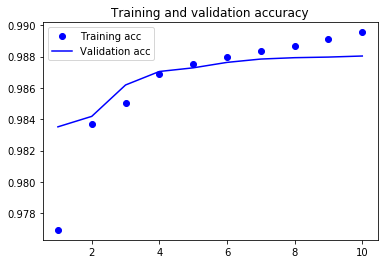

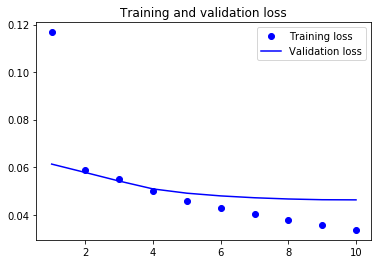

2246/2246 [==============================] - 0s 39us/step
Loss: 0.046
Accuracy: 0.988


In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
scores = model.evaluate(x_test, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [9]:
#We'll start by building a simple model using embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(500, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
# convolution layers
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(46, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            4000      
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               410112    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)                23598     
Total params: 437,710
Trainable params: 437,710
Non-trainable params: 0
_________________________________________________________________
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 4s 492us/step - loss: 0.0754 - a

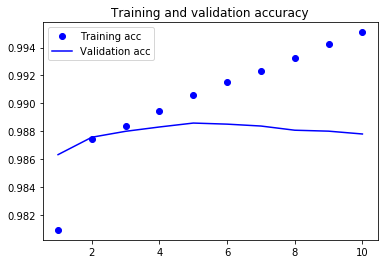

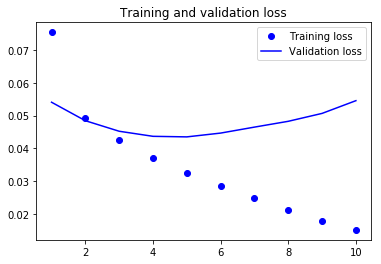

2246/2246 [==============================] - 0s 92us/step
Loss: 0.055
Accuracy: 0.988


In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
scores = model.evaluate(x_test, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])